# A Network of Thrones - Season 1

**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [3]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

In [4]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [5]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [6]:
relations_df = pd.read_csv(folder+"data/got-s1-edges.csv")
characters_df  = pd.read_csv(folder+"data/got-s1-nodes.csv")

In [7]:
# Delete self-loops - there are no self-loops in the data.

#self_loop = []
#for i in range(len(relations)):
#  if relations["Source"][i] == relations["Target"][i]:
#    self_loop.append(i)
#
#
#relations = relations.drop(set(self_loop)).reset_index()

In [8]:
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Check for duplicate Ids
duplicates = characters_df[characters_df.duplicated('Id', keep=False)]
if not duplicates.empty:
    print("Duplicate Ids found in characters_df:")
    print(duplicates)

# Remove duplicates based on Id (keeping the first occurrence)
characters_df = characters_df.drop_duplicates(subset='Id')

# Create the NetworkX graph from the edge list
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Convert characters DataFrame to dictionary and add nodes with attributes
characters = characters_df.set_index('Id').to_dict('index')

G.add_nodes_from(characters.items())
print(G.nodes(data=True))
print(G.edges(data=True))

[('NED', {'Label': 'Ned'}), ('ROBERT', {'Label': 'Robert'}), ('DAENERYS', {'Label': 'Daenerys'}), ('JORAH', {'Label': 'Jorah'}), ('JON', {'Label': 'Jon'}), ('SAM', {'Label': 'Sam'}), ('LITTLEFINGER', {'Label': 'Petyr'}), ('VARYS', {'Label': 'Varys'}), ('DROGO', {'Label': 'Drogo'}), ('ARYA', {'Label': 'Arya'}), ('CATELYN', {'Label': 'Catelyn'}), ('ROBB', {'Label': 'Robb'}), ('BRONN', {'Label': 'Bronn'}), ('TYRION', {'Label': 'Tyrion'}), ('CERSEI', {'Label': 'Cersei'}), ('SHAE', {'Label': 'Shae'}), ('JOFFREY', {'Label': 'Joffrey'}), ('SANSA', {'Label': 'Sansa'}), ('PYCELLE', {'Label': 'Pycelle'}), ('VISERYS', {'Label': 'Viserys'}), ('SEPTA_MORDANE', {'Label': 'Septa Mordane'}), ('TYWIN', {'Label': 'Tywin'}), ('JEOR', {'Label': 'Jeor'}), ('THEON', {'Label': 'Theon'}), ('BRAN', {'Label': 'Bran'}), ('MAESTER_LUWIN', {'Label': 'Luwin'}), ('JAIME', {'Label': 'Jaime'}), ('LORAS', {'Label': 'Loras'}), ('RENLY', {'Label': 'Renly'}), ('MIRRI_MAZ_DUUR', {'Label': 'Mirri Maz Dur'}), ('SYRIO_FOREL',

In [9]:
g = ig.Graph.from_networkx(G)
# Generate the spring layout using NetworkX
spring_layout = nx.spring_layout(G)

# Prepare colors for the nodes
node_colors = ["LightGreen" for _ in range(len(G.nodes()))]

# Apply PageRank
pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)

# Set the node sizes based on PageRank
min_size = 20  # Minimum node size
max_size = 200  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))

# Add positions to igraph nodes
positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()



Output hidden; open in https://colab.research.google.com to view.

## First Analysis

Let's list the various characters

In [10]:
for nm in g.vs():
  print(nm['Label'])

Ned
Robert
Daenerys
Jorah
Jon
Sam
Petyr
Varys
Drogo
Arya
Catelyn
Robb
Bronn
Tyrion
Cersei
Shae
Joffrey
Sansa
Pycelle
Viserys
Septa Mordane
Tywin
Jeor
Theon
Bran
Luwin
Jaime
Loras
Renly
Mirri Maz Dur
Syrio
Jory
Pyp
Ros
Grenn
Walder
Doreah
Benjen
Irri
Greatjon
Mord
Lysa
Rakharo
Robin
Osha
Rodrik
Qotho
Aemon
Barristan
Illyrio
Shagga
Yoren
Allister
Wine Merchant
Sandor
Lancel
Rickon
Marillion
Kevan
Vardis
Rhaego
Janos
Gendry
Hot Pie
Lommy
Meryn
Jon Arryn
Hodor
Stannis
Mago
Mycah
Tobho Mott
Rast
Old Nan
Mhaegen
Aerys
Baelor
Dareon
Stable Boy
Hugh of the Vale
Othell
Othor
Gregor
Tomard
Gared
Royce
Jonos
Masha
Rickard Stark
Ilyn
Will
Lyanna
Ryger
Stevron
Waymar
Addam
Leo
Rhaegar
Assassin
Balon
Beric
Brandon
Hoster
Cohollo
Jhiqui
Myrcella
Aegon
Borcas
Bowen
Luke
Irogenia
Galbart
Rickard Karstark
High Septon
Tysha
Jaremy
Joanna
Tommen
Little Bird
Joyeuse
Mac
Melessa
Roose
Steffon
Varly
Randyll


### Size

In [11]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

Number of possible edges (N*(N-1)): 7875
Number of nodes (Graph Order): 126
Number of edges (Graph Size): 549
Graph Density: 0.06971428571428571


### Distribution

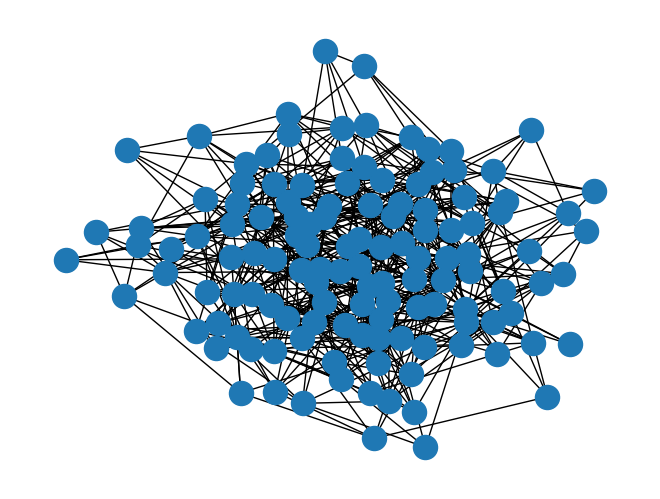

In [12]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [13]:
print("number of nodes:",len(rand_net.nodes()), "number of edges", len(rand_net.edges()))

#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

#Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the random network", nx.average_shortest_path_length(G)/nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the random network", nx.average_clustering(G)/nx.average_clustering(rand_net))

number of nodes: 126 number of edges 561
average shortest path for the random network 2.446730158730159
clustering coefficient for the random network 0.08910296053153192
normalised average shortest path for the random network 1.0809113556155283
normalised clustering coefficient for the random network 7.0666705051206735


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [14]:
# If λ and γ fulfil certain criteria (e.g., λ≈1 and γ>1), the network is a small-world network.

lambda_val = nx.average_shortest_path_length(G)/nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G)/nx.average_clustering(rand_net)

if lambda_val == 1 and gamma_val > 1:
  print("This network is a small network")
  print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
  print("This network is not a small network")

This network is not a small network


In [15]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [16]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

Graph is connected


### Diameter

The diameter is the highest distance in the network

In [17]:
print("Graph Diameter:", g.diameter(directed=False))

Graph Diameter: 6


Path between most distant nodes: ['Irogenia', 'Doreah', 'Daenerys', 'Ned', 'Jon', 'Sam', 'Melessa']
Average path length: 2.6446984126984128
Average shortest path length: 2.6446984126984128


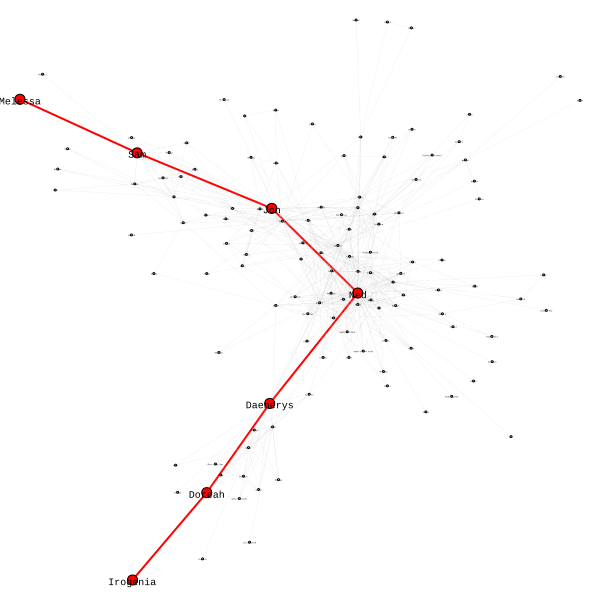

In [18]:
import networkx as nx
import igraph as ig

# Calculate the diameter path using igraph
d = g.get_diameter()

# GET NODES IN THE DIAMETER PATH
diameter_path = d

# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(pairs=[(d[i], d[i+1]) for i in range(len(d)-1)], directed=False)

# Visual style for plotting
visual_style = {
    "vertex_color": ["red" if node.index in diameter_path else "white" for node in g.vs],
    "edge_color": ["red" if edge.index in diameter_edges else "grey" for edge in g.es],
    "edge_width": [2 if edge.index in diameter_edges else 0.1 for edge in g.es],
    "vertex_label": [node["Label"] for node in g.vs],
    "vertex_size": [10 if node.index in diameter_path else 2 for node in g.vs],
    "vertex_label_size": [10 if node.index in diameter_path else 2 for node in g.vs]

}

print("Path between most distant nodes:", [g.vs[index]["Label"] for index in diameter_path])

# AVERAGE PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE
print("Average path length:", g.average_path_length(directed=False))

# Check if G is connected (for NetworkX)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

# Plot the graph
ig.plot(g, **visual_style)


### Shortest Paths

Shortest paths between Daenerys and other nodes [['Daenerys', 'Ned'], ['Daenerys', 'Robert'], ['Daenerys'], ['Daenerys', 'Jorah'], ['Daenerys', 'Catelyn', 'Jon'], ['Daenerys', 'Robert', 'Jon'], ['Daenerys', 'Ned', 'Jon'], ['Daenerys', 'Ned', 'Pyp', 'Sam'], ['Daenerys', 'Ned', 'Jeor', 'Sam'], ['Daenerys', 'Robert', 'Jeor', 'Sam'], ['Daenerys', 'Ned', 'Jon', 'Sam'], ['Daenerys', 'Robert', 'Jon', 'Sam'], ['Daenerys', 'Catelyn', 'Jon', 'Sam'], ['Daenerys', 'Sansa', 'Petyr'], ['Daenerys', 'Catelyn', 'Petyr'], ['Daenerys', 'Varys', 'Petyr'], ['Daenerys', 'Robert', 'Petyr'], ['Daenerys', 'Ned', 'Petyr'], ['Daenerys', 'Varys'], ['Daenerys', 'Drogo'], ['Daenerys', 'Illyrio', 'Arya'], ['Daenerys', 'Sansa', 'Arya'], ['Daenerys', 'Catelyn', 'Arya'], ['Daenerys', 'Varys', 'Arya'], ['Daenerys', 'Robert', 'Arya'], ['Daenerys', 'Ned', 'Arya'], ['Daenerys', 'Catelyn'], ['Daenerys', 'Sansa', 'Robb'], ['Daenerys', 'Catelyn', 'Robb'], ['Daenerys', 'Varys', 'Robb'], ['Daenerys', 'Robert', 'Robb'], ['Daener

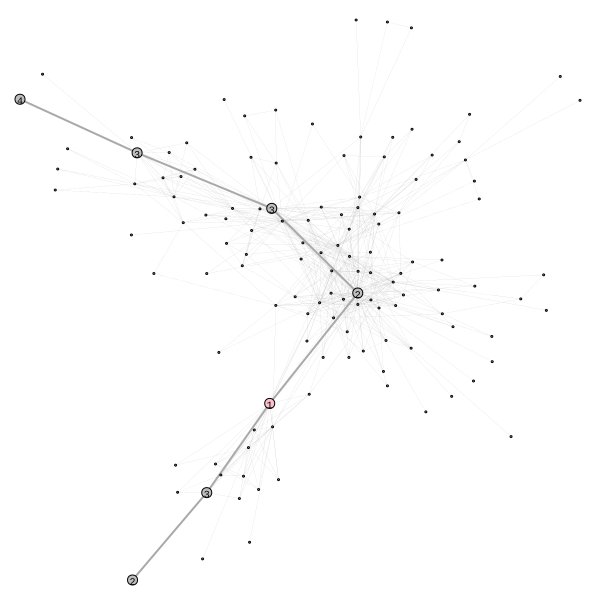

In [19]:
# SHORTEST PATHS
shortest_paths = {}
for node in nodes:
    shortest_paths[node["Label"]]=[nodes[v]["Label"] for v in g.get_all_shortest_paths(node)
                                                    ]
# SHOW DISTANCES OF SHORTEST PATHS BETWEEN ONE NODE AND EVERYBODY ELSE

node_name = "Daenerys"
print("Shortest paths between", node_name,"and other nodes", shortest_paths[node_name])

distances = [len(path) for path in shortest_paths[node_name]]

visual_style["vertex_color"] = ["pink" if node["Label"]==node_name else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

visual_style["vertex_label"] = distances

ig.plot(g, **visual_style)

In [20]:
sp = nx.shortest_path(G) #between all nodes
print(sp)

{'NED': {'NED': ['NED'], 'ROBERT': ['NED', 'ROBERT'], 'LITTLEFINGER': ['NED', 'LITTLEFINGER'], 'VARYS': ['NED', 'VARYS'], 'ARYA': ['NED', 'ARYA'], 'CERSEI': ['NED', 'CERSEI'], 'CATELYN': ['NED', 'CATELYN'], 'PYCELLE': ['NED', 'PYCELLE'], 'JAIME': ['NED', 'JAIME'], 'SANSA': ['NED', 'SANSA'], 'JORY_CASSEL': ['NED', 'JORY_CASSEL'], 'JOFFREY': ['NED', 'JOFFREY'], 'RENLY': ['NED', 'RENLY'], 'BRAN': ['NED', 'BRAN'], 'JON': ['NED', 'JON'], 'BARRISTAN': ['NED', 'BARRISTAN'], 'ROBB': ['NED', 'ROBB'], 'YOREN': ['NED', 'YOREN'], 'BENJEN': ['NED', 'BENJEN'], 'JANOS': ['NED', 'JANOS'], 'THEON': ['NED', 'THEON'], 'GENDRY': ['NED', 'GENDRY'], 'JON_ARRYN': ['NED', 'JON_ARRYN'], 'TYRION': ['NED', 'TYRION'], 'TYWIN': ['NED', 'TYWIN'], 'HOUND': ['NED', 'HOUND'], 'RODRIK': ['NED', 'RODRIK'], 'STANNIS': ['NED', 'STANNIS'], 'TOBHO_MOTT': ['NED', 'TOBHO_MOTT'], 'MHAEGEN': ['NED', 'MHAEGEN'], 'SEPTA_MORDANE': ['NED', 'SEPTA_MORDANE'], 'AERYS': ['NED', 'AERYS'], 'BAELOR': ['NED', 'BAELOR'], 'HUGH_OF_THE_VALE':

<class 'networkx.utils.decorators.argmap'> compilation 58:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [21]:
i = 0
for _, v in sp.items():
  for char, dic in v.items():
    if len(dic) == 4:
      i = i+1

print("The number of the shortest path long as the diameter are", i)

The number of the shortest path long as the diameter are 6752


In [22]:
#Average shortest paths
avg_sp = nx.average_shortest_path_length(G)
print(avg_sp)

2.6446984126984128


### Node Degrees

In [23]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)

# Prepare data for DataFrame
degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)

# Print results
print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



Node degrees:
First 10 nodes with highest degree
       Node  Degree  Average degree of node's neighbours
0       Ned      57                            13.245614
13   Tyrion      41                            14.707317
1    Robert      36                            17.333333
10  Catelyn      36                            17.083333
11     Robb      30                            17.700000
14   Cersei      29                            20.103448
9      Arya      28                            18.428571
16  Joffrey      27                            20.222222
6     Petyr      26                            18.923077
4       Jon      26                            18.730769


Last 5 nodes with lowest degree
         Node  Degree  Average degree of node's neighbours
92      Ryger       1                                  8.0
110  Irogenia       1                                  8.0
94     Waymar       1                                  8.0
105  Myrcella       1                                 

In [24]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

maximum degree: 57
minimum degree: 1
average degree: 8.714285714285714
most frequent degree (mode): 2 with 18 nodes


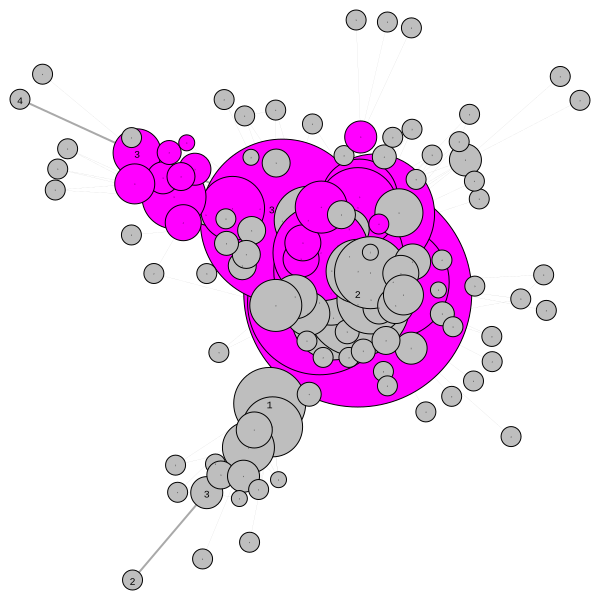

In [25]:
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [4*degree if degree>3 else 20 for degree in g.degree()]

#COLOR NEAREST NEIGHBORS OF A CERTAIN NODE
node_name = "Jon"
for node in nodes:
    if node["Label"] == node_name:
        node_index = node.index

neighbors = g.neighborhood(nodes[node_index],order=1)
visual_style["vertex_color"] = ["fuchsia" if node.index in neighbors else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

ig.plot(g, **visual_style)

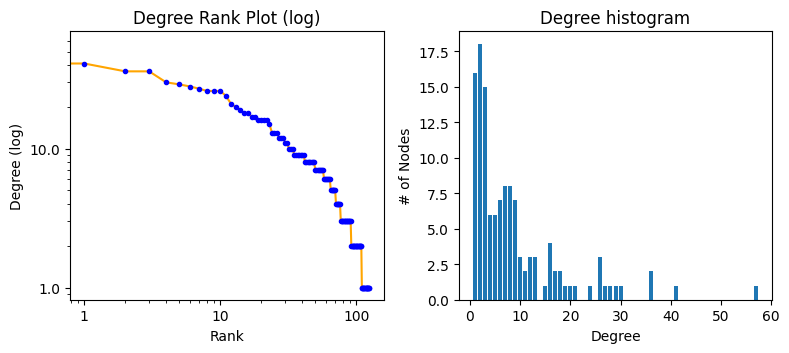

In [26]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot (log)")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank")
ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


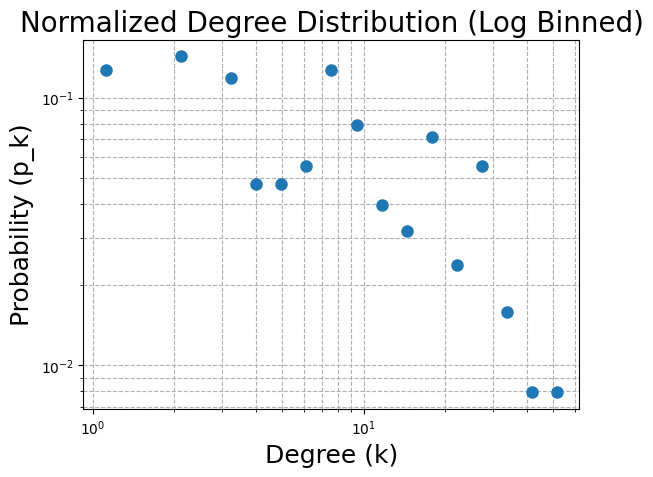

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming degree_df['Degree'] contains the degree data from the original code
degree_data = degree_df['Degree'].values

# Calculate the degree distribution
degrees = degree_data[degree_data > 0]  # Avoid zero degree
unique_degrees, counts = np.unique(degrees, return_counts=True)

# Normalize the degree counts
total_nodes = np.sum(counts)
pk = counts / total_nodes  # p_k is the probability of each degree

# Log binning
bins = np.logspace(np.log10(min(unique_degrees)), np.log10(max(unique_degrees)), num=20)
bin_counts, bin_edges = np.histogram(degrees, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_probs = bin_counts / total_nodes

# Plotting the normalized degree distribution with log binning
fig, ax = plt.subplots()
ax.loglog(bin_centers, bin_probs, 'o', markersize=8)
ax.set_title("Normalized Degree Distribution (Log Binned)", size=20)
ax.set_xlabel("Degree (k)", size=18)
ax.set_ylabel("Probability (p_k)", size=18)
ax.grid(True, which="both", ls="--")
plt.show()


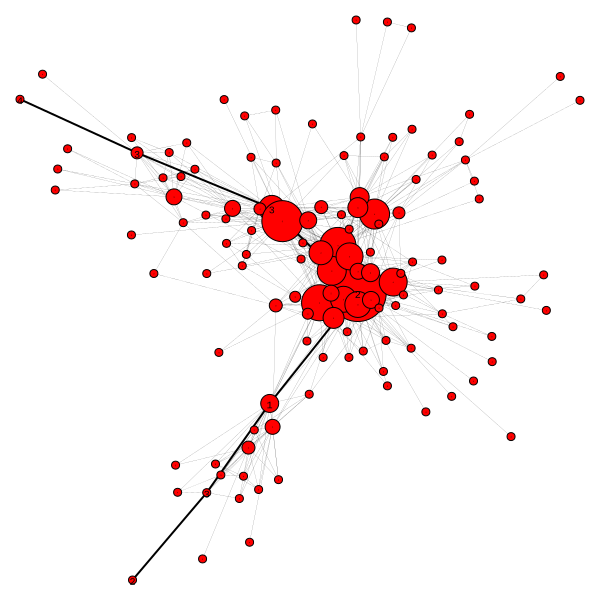

In [28]:
visual_style["vertex_size"] = [degree if degree>10 else 8 for degree in g.degree()]
visual_style['edge_color'] = 'black'
visual_style['vertex_color'] = 'red'
ig.plot(g, **visual_style)

### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [29]:
if g.bridges():
  print("The network has bridges.")
  bridges = g.bridges()
  print("The bridges are:", bridges)
else:
  print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))


The network has bridges.
The bridges are: [51, 53, 55, 56, 119, 153, 155, 203, 216, 319, 322, 448, 475, 479, 482, 547]
Number of bridges: 16


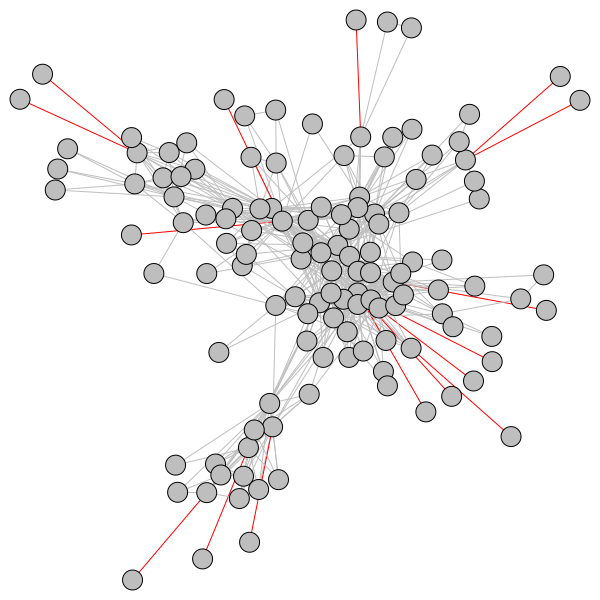

In [30]:
visual_style = {}

bridges_index = g.bridges()

visual_style["vertex_color"] = 'grey'
visual_style["edge_color"] = ["red" if edge.index in bridges_index else "grey" for edge in edges]

ig.plot(g, **visual_style)

### Giant Components



In [31]:
clusters = g.connected_components()
clusters = sorted(clusters, key=len, reverse=True)

# Get the largest connected component
largest_cc = clusters[0]
G0 = g.subgraph(largest_cc)

# Check if the original graph is isomorphic to the largest connected component
if g.isomorphic(G0):
    print("This network is connected and there are no isolated nodes")
else:
    print("This network has", len(clusters), "components")

This network is connected and there are no isolated nodes


### Centrality

In [32]:
# Closeness centrality
clo_cen = nx.closeness_centrality(G)
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)
# Harmonic centrality
har_cen = nx.harmonic_centrality(G)
# degree centrality
degree_cen = nx.degree_centrality(G)

centrality_df = pd.DataFrame(data = list(zip(bet_cen.keys(), bet_cen.values(), clo_cen.values(), eig_cen.values(), [1/x for x in list(har_cen.values())], degree_cen.values())),
                             columns = ['Node', 'Betweenness centrality', 'Closeness centrality', 'Eigenvector centrality', 'Harmonic centrality', 'Degree centrality'])
centrality_df

Node  Betweenness centrality  Closeness centrality  \
0             NED                0.303280              0.628141   
1          ROBERT                0.110395              0.553097   
2        DAENERYS                0.101431              0.456204   
3           JORAH                0.053910              0.432526   
4             JON                0.085336              0.518672   
..            ...                     ...                   ...   
121       MELESSA                0.000000              0.265957   
122  ROOSE_BOLTON                0.000000              0.386997   
123       STEFFON                0.000000              0.386997   
124         VARLY                0.000000              0.386997   
125       RANDYLL                0.000000              0.265957   

     Eigenvector centrality  Harmonic centrality  Degree centrality  
0                  0.315082             0.020870              0.456  
1                  0.248190             0.022936              0.288  
2                  0.073714             0.019627              0.144  
3                  0.042859             0.027972              0.120  
4                  0.168281             0.014406              0.208  
..                      ...                  ...                ...  
121                0.001479             0.017442              0.008  
122                0.016865             0.016304              0.008  
123                0.016865             0.018634              0.008  
124                0.016865             0.015915              0.008  
125                0.001479             0.013873              0.008  

[126 rows x 6 columns]

In [33]:
print("Mean values of Centralities:")
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))

Mean values of Centralities:
Betweenness: 0.013263696876600102
Closeness: 0.38925380664201314
Eigenvector: 0.05904663678946902
Harmonic: 0.01866740414436125
Degree: 0.06971428571428569


In [34]:
def highest_centrality(centrality_dict):
  # Create ordered tuple of centrality data
  cent_items=[(b,a) for (a,b) in centrality_dict.items()]
  # Sort in descending order
  cent_items.sort()
  cent_items.reverse()
  return tuple(reversed(cent_items[0]))

def k_highest_centrality(centrality_dict, k):
  # Create ordered tuple of centrality data
  cent_items=[(b,a) for (a,b) in centrality_dict.items()]
  # Sort in descending order
  cent_items.sort()
  cent_items.reverse()
  return tuple(cent_items[0:k])

In [35]:
# Closeness centrality
highest_centrality_clo_cen = highest_centrality(clo_cen)
# Betweenness centrality
highest_centrality_bet_cen = highest_centrality(bet_cen)
# Eigenvector centrality
highest_centrality_eig_cen = highest_centrality(eig_cen)
# Harmonic centrality
highest_centrality_har_cen = highest_centrality(har_cen)
# degree centrality
highest_centrality_degree_cen = highest_centrality(degree_cen)

central_char = []
central_score =  []

central_char.extend([highest_centrality_clo_cen[0], highest_centrality_bet_cen[0], highest_centrality_eig_cen[0], highest_centrality_har_cen[0], highest_centrality_degree_cen[0]])
central_score.extend([highest_centrality_clo_cen[1], highest_centrality_bet_cen[1], highest_centrality_eig_cen[1], 1/highest_centrality_har_cen[1], highest_centrality_degree_cen[1]])

centrality_df = pd.DataFrame(data = list(zip(central_char, central_score)), columns = ['Most central character', 'Score'])
centrality_df

Most central character     Score
0                    NED  0.628141
1                    NED  0.303280
2                    NED  0.315082
3                    NED  0.011111
4                    NED  0.456000

In [36]:
def createCol(cen):
  central_char = []
  central_score =  []
  for i in range(len(cen)):
    central_char.append(cen[i][1])
    central_score.append(cen[i][0])
  return list(central_char), list(central_score)

#5 most central character
highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = createCol(highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = createCol(highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = createCol(highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = createCol(highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = createCol(highest_centrality_degree_cen)

centrality_df = pd.DataFrame(data = list(zip(bet_cen_char, bet_cen_scores, clo_cen_char, clo_cen_scores, eig_cen_char, eig_cen_scores, har_cen_char, [1/x for x in har_cen_scores], degree_cen_char, degree_cen_scores)),
                             columns = ['Most central character - Betweenness ', 'Score - Betweenness', 'Most central character - Closeness ', 'Score - Closeness ', 'Most central character - Eigenvector ', 'Score - Eigenvector ',
                             'Most central character - Harmonic ', 'Score - Harmonic ', 'Most central character - Degree ', 'Score - Degree '])
centrality_df

Most central character - Betweenness   Score - Betweenness  \
0                                   NED             0.303280   
1                                TYRION             0.163027   
2                               CATELYN             0.118284   
3                                ROBERT             0.110395   
4                              DAENERYS             0.101431   

  Most central character - Closeness   Score - Closeness   \
0                                 NED            0.628141   
1                              ROBERT            0.553097   
2                             CATELYN            0.550661   
3                              TYRION            0.543478   
4                                 JON            0.518672   

  Most central character - Eigenvector   Score - Eigenvector   \
0                                   NED              0.315082   
1                                ROBERT              0.248190   
2                                CERSEI              0.239262   
3                               CATELYN              0.236866   
4                                TYRION              0.229763   

  Most central character - Harmonic   Score - Harmonic   \
0                                NED           0.011111   
1                             TYRION           0.012565   
2                             ROBERT           0.012739   
3                            CATELYN           0.012766   
4                               ROBB           0.013590   

  Most central character - Degree   Score - Degree   
0                              NED            0.456  
1                           TYRION            0.328  
2                           ROBERT            0.288  
3                          CATELYN            0.288  
4                             ROBB            0.240

### Homophily

In [37]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

Degree assortativity coefficient: -0.14114137624962103


In [38]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node  Second node     Score
495            LYSA        ROBIN  0.750000
473           GRENN         RAST  0.666667
456  MIRRI_MAZ_DUUR        QOTHO  0.666667
501           ROBIN  VARDIS_EGEN  0.625000
496            LYSA  VARDIS_EGEN  0.625000
..              ...          ...       ...
482          DOREAH     IROGENIA  0.000000
322          TYRION       JOANNA  0.000000
56              NED        VARLY  0.000000
479          WALDER      JOYEUSE  0.000000
203           DROGO      COHOLLO  0.000000

[549 rows x 3 columns]

### Triangles

In [39]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

List of all the edges involved in the traingles


[('NED', 'ROBERT', 'LITTLEFINGER'),
 ('NED', 'ROBERT', 'VARYS'),
 ('NED', 'ROBERT', 'ARYA'),
 ('NED', 'ROBERT', 'CERSEI'),
 ('NED', 'ROBERT', 'CATELYN'),
 ('NED', 'ROBERT', 'PYCELLE'),
 ('NED', 'ROBERT', 'JAIME'),
 ('NED', 'ROBERT', 'SANSA'),
 ('NED', 'ROBERT', 'JORY_CASSEL'),
 ('NED', 'ROBERT', 'JOFFREY'),
 ('NED', 'ROBERT', 'RENLY'),
 ('NED', 'ROBERT', 'BRAN'),
 ('NED', 'ROBERT', 'JON'),
 ('NED', 'ROBERT', 'BARRISTAN'),
 ('NED', 'ROBERT', 'ROBB'),
 ('NED', 'ROBERT', 'BENJEN'),
 ('NED', 'ROBERT', 'JON_ARRYN'),
 ('NED', 'ROBERT', 'TYRION'),
 ('NED', 'ROBERT', 'TYWIN'),
 ('NED', 'ROBERT', 'HOUND'),
 ('NED', 'ROBERT', 'STANNIS'),
 ('NED', 'ROBERT', 'AERYS'),
 ('NED', 'ROBERT', 'MAESTER_LUWIN'),
 ('NED', 'ROBERT', 'MOUNTAIN'),
 ('NED', 'ROBERT', 'LANCEL'),
 ('NED', 'ROBERT', 'LORAS'),
 ('NED', 'ROBERT', 'LYANNA'),
 ('NED', 'ROBERT', 'BERIC'),
 ('NED', 'ROBERT', 'DAENERYS'),
 ('NED', 'ROBERT', 'JEOR')]

In [40]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

Character  # of triangles in which they are involved
0            NED                                        280
1         ROBERT                                        185
14        CERSEI                                        181
10       CATELYN                                        180
13        TYRION                                        175
16       JOFFREY                                        152
11          ROBB                                        142
6   LITTLEFINGER                                        139
17         SANSA                                        137
9           ARYA                                        136

In [41]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

There are 1254 triangles


Investigating interesting character triangles

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Find all triangles in the graph
triangles = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

# Compute the strengths and max edge weights of all triangles
triangle_strengths_and_max_edges = []
for triangle in triangles:
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

# Sort triangles by strength in descending order and select the top 10
top_triangles = sorted(triangle_strengths_and_max_edges, key=lambda x: x[1], reverse=True)[:30]

# Highlight the nodes and edges in the top 10 triangles
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    color = "Crimson"  # Use a single color for all top triangles or set a different color if needed
    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the top 10 triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Define the highlighted triangles with colors
highlighted_triangles = [
    (('NED', 'ROBERT', 'CERSEI'), "DeepSkyBlue"),
    (('NED', 'LITTLEFINGER', 'VARYS'), "Crimson"),
    (('NED', 'ARYA', 'SANSA'), "HotPink"),
    (('ARYA', 'JOFFREY', 'SANSA'), "DarkGreen"),
    (('CERSEI', 'JOFFREY', 'SANSA'), "Yellow"),
    (('CATELYN', 'ROBB', 'BRAN'), "MediumPurple"),
    (('JON', 'SAM', 'PYP'), "Orange"),
    (('DAENERYS', 'DROGO', 'VISERYS'), "LimeGreen"),
    (('DAENERYS', 'JORAH', 'VISERYS'), "HotPink"),
    (('DAENERYS', 'JORAH', 'DROGO'), "LightBlue"),

]

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

Specifically about a character

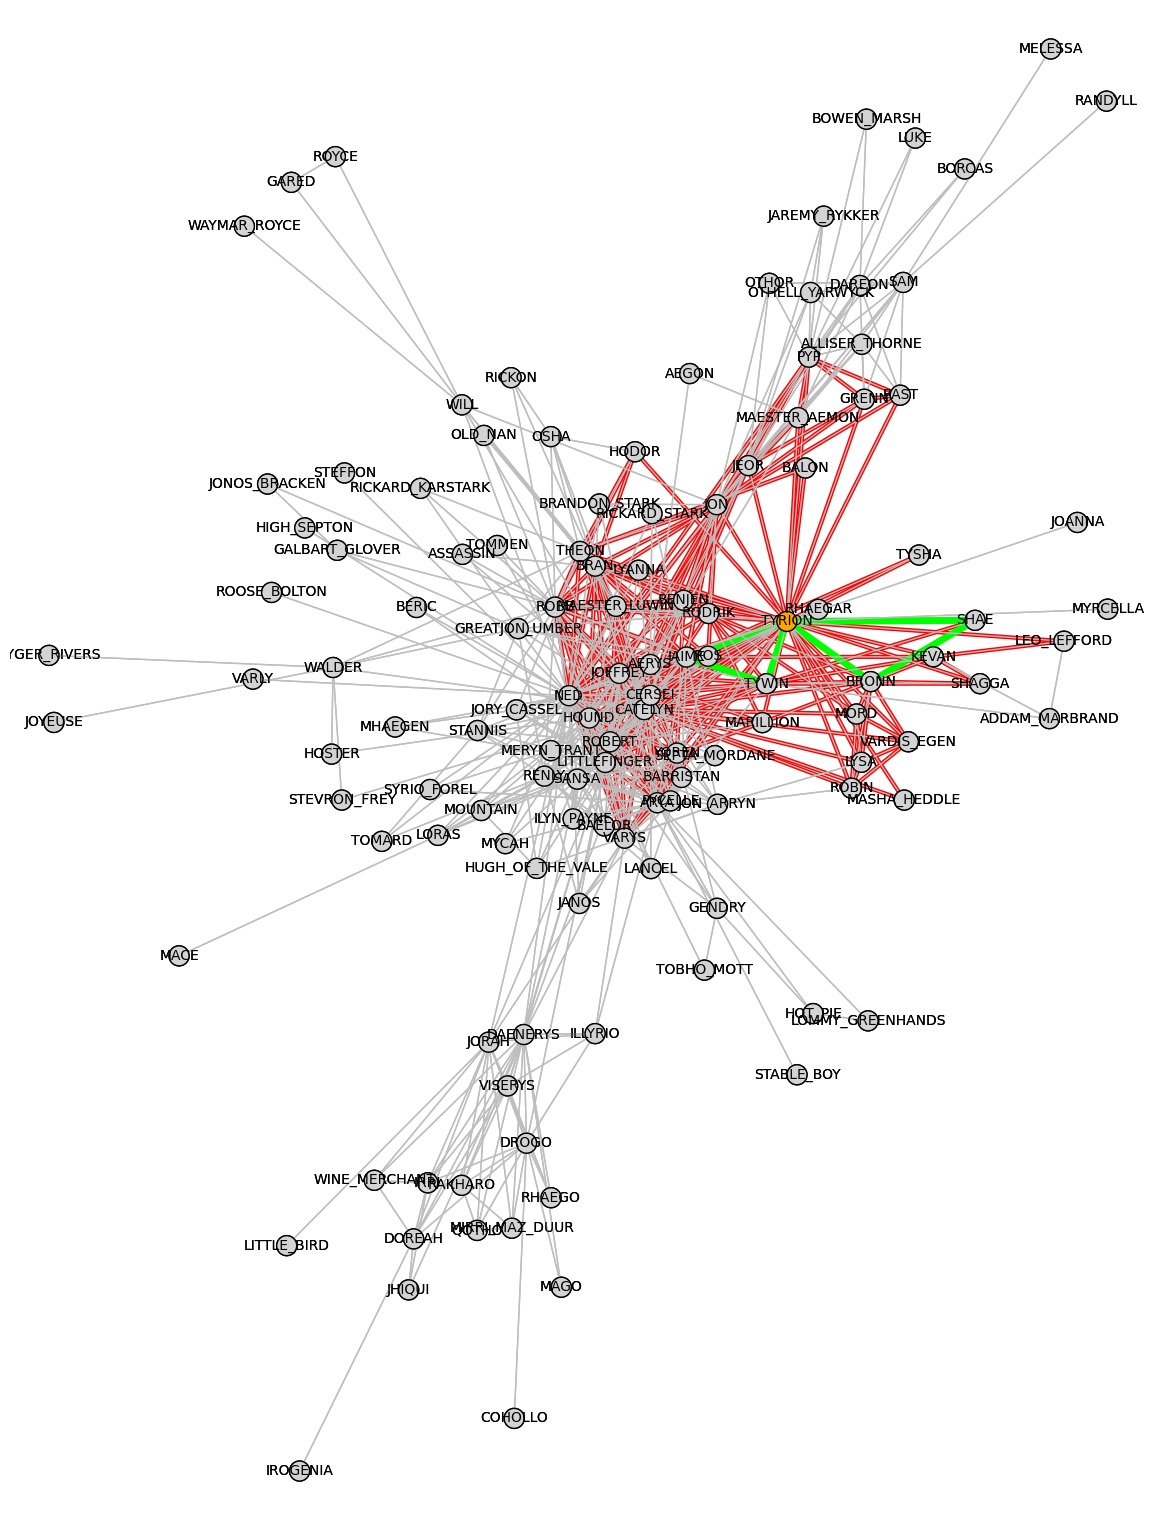

In [44]:
import itertools
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

# Assuming G is your NetworkX graph and g is your igraph graph
highlight_node = "TYRION"

# Function to find all triangles involving a specific node
def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("orange")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Specific triangles to highlight
specific_triangles = [
    ("TYRION", "TYWIN", "JAIME"),
    ("TYWIN", "TYRION", "JAIME"),
    ("TYWIN", "JAIME", "TYRION"),
    ("JAIME", "TYWIN", "TYRION"),
    ("JAIME", "TYRION", "TYWIN"),
    ("TYWIN", "TYRION", "JAIME"),
    ("TYRION", "BRONN", "SHAE"),
    ("TYRION", "SHAE", "BRONN")
]

# Highlight edges in triangles involving TYRION in red
for triangle in highlighted_triangles:
    if set(triangle) in map(set, specific_triangles):
        continue  # Skip the specific triangles

    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Initialize edge colors and widths for specific triangles
specific_edge_colors = ["grey"] * len(G.edges())
specific_edge_widths = [1] * len(G.edges())

# Highlight edges in specific triangles in green
for triangle in specific_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            specific_edge_colors[edge_index] = "green"  # Color edges in specific triangles with green
            specific_edge_widths[edge_index] = 5  # Thicker width for edges in specific triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]

# Ensure the 'Label' attribute is correctly set for the igraph graph
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot all nodes and edges except the specific ones first
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    edge_color=edge_colors,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_width=edge_widths,
    bbox=(1000, 1000),  # Adjust the plot size as needed
    margin=50  # Margin around the plot
)

# Plot the specific edges on top
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    edge_color=specific_edge_colors,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_width=specific_edge_widths,
    bbox=(1000, 1000),  # Adjust the plot size as needed
    margin=50,  # Margin around the plot
    add=True  # Add to the existing plot
)

plt.show()


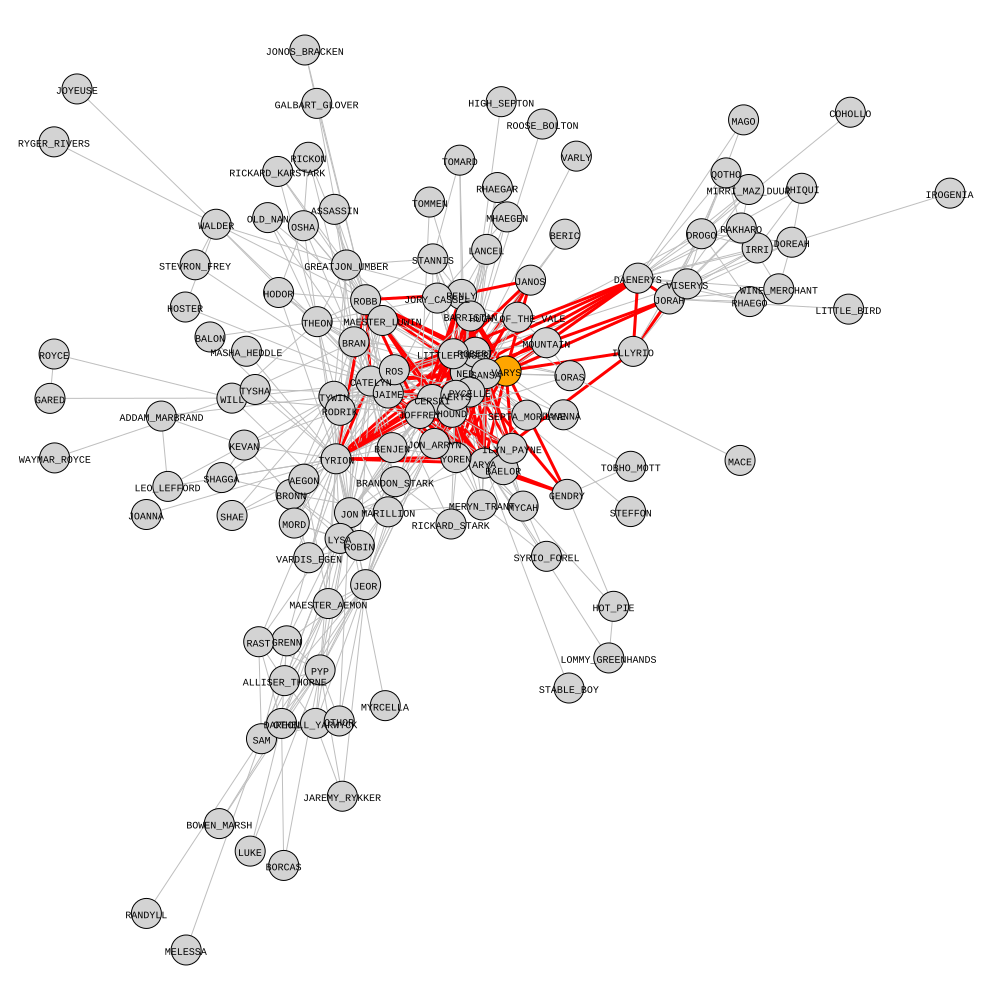

In [45]:
highlight_node = "VARYS"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Specify the character whose triangles we want to highlight


# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("orange")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]

node_sizes = [30] * len(G.nodes())

# Plot the graph with igraph
ig.plot(
    g,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    edge_color=edge_colors,
    edge_width=edge_widths,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    bbox=(1000, 1000),  # Adjust the plot size as needed
    margin=50  # Margin around the plot
)


### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [46]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

Global clustering coefficient (Triadic Closure) 0.38325183374083127


In [47]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node NED : 0.1754385964912281
   Local clustering coefficient of node ROBERT : 0.29365079365079366
   Local clustering coefficient of node DAENERYS : 0.3137254901960784
   Local clustering coefficient of node JORAH : 0.33333333333333337
   Local clustering coefficient of node JON : 0.36
   Local clustering coefficient of node SAM : 0.4696969696969697
   Local clustering coefficient of node LITTLEFINGER : 0.42769230769230765
   Local clustering coefficient of node VARYS : 0.48571428571428565
   Local clustering coefficient of node DROGO : 0.3846153846153846
   Local clustering coefficient of node ARYA : 0.35978835978835977
   Local clustering coefficient of node CATELYN : 0.2857142857142857
   Local clustering coefficient of node ROBB : 0.3264367816091954
   Local clustering coefficient of node BRONN : 0.4696969696969697
   Local clustering coefficient of node TYRION : 0.2134146341463415
   Local clustering coefficient of n

In [48]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))


Average clustering component 0.6296612631071081


## Communities

In [49]:
# CLUSTERS, COMMUNITIES, GROUPS - WHAT ARE THE NODES THAT ARE MORE CONNECTED TO EACH OTHER THAN TO OTHER NODES
# check out the different community algorithms and pick the one you'd like

#Calculates the optimal modularity score of the graph and the corresponding community structure.
#This function uses the GNU Linear Programming Kit to solve a large integer optimization problem
#in order to find the optimal modularity score and the corresponding community structure, therefore
#it is unlikely to work for graphs larger than a few (less than a hundred) vertices.
#Consider using one of the heuristic approaches instead if you have such a large graph.

#communities = g.community_optimal_modularity() # does not converge


#community_colors = random.sample(colors,len(communities))
#node_colors = {}
#counter = 0
#
#print("Communities in the network:")
#
#for community in communities:
#    print("  ",[nodes[member]["Label"] for member in community])
#    for member in community:
#        node_colors[member] = community_colors[counter]
#
#    counter += 1
#
#visual_style["vertex_color"] = [node_colors[node.index] for node in nodes]
#visual_style["vertex_label"] = g.vs["Label"]
#
#ig.plot(g, **visual_style)

### Infomap

In [50]:
infomap = g.community_infomap()

In [51]:
# Creating clusters of characters
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []
cluster_8=[]
infomap_comm = infomap.membership

for i, node in enumerate(G.nodes()):
  if infomap_comm[i] == 0:
    cluster_1.append(node)
  elif infomap_comm[i] == 1:
    cluster_2.append(node)
  elif infomap_comm[i] == 2:
    cluster_3.append(node)
  elif infomap_comm[i] == 3:
    cluster_4.append(node)
  elif infomap_comm[i] == 4:
    cluster_5.append(node)
  elif infomap_comm[i] == 5:
    cluster_6.append(node)
  elif infomap_comm[i] == 6:
    cluster_7.append(node)


infomap_comm = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

Number of communities detected: 7


In [52]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")

List of Characters by Community
Cluster 1: ['NED', 'ROBERT', 'LITTLEFINGER', 'VARYS', 'ARYA', 'CERSEI', 'JOFFREY', 'SANSA', 'PYCELLE', 'SEPTA_MORDANE', 'JAIME', 'LORAS', 'RENLY', 'SYRIO_FOREL', 'JORY_CASSEL', 'ROS', 'BENJEN', 'BARRISTAN', 'YOREN', 'HOUND', 'LANCEL', 'JANOS', 'GENDRY', 'HOT_PIE', 'LOMMY_GREENHANDS', 'MERYN_TRANT', 'JON_ARRYN', 'STANNIS', 'MYCAH', 'TOBHO_MOTT', 'MHAEGEN', 'AERYS', 'BAELOR', 'STABLE_BOY', 'HUGH_OF_THE_VALE', 'MOUNTAIN', 'TOMARD', 'RICKARD_STARK', 'ILYN_PAYNE', 'LYANNA', 'RHAEGAR', 'BERIC', 'BRANDON_STARK', 'HIGH_SEPTON', 'TOMMEN', 'MACE', 'ROOSE_BOLTON', 'STEFFON', 'VARLY']
Cluster 2: ['DAENERYS', 'JORAH', 'DROGO', 'VISERYS', 'MIRRI_MAZ_DUUR', 'DOREAH', 'IRRI', 'RAKHARO', 'QOTHO', 'ILLYRIO', 'WINE_MERCHANT', 'RHAEGO', 'MAGO', 'COHOLLO', 'JHIQUI', 'IROGENIA', 'LITTLE_BIRD']
Cluster 3: ['JON', 'SAM', 'JEOR', 'PYP', 'GRENN', 'MAESTER_AEMON', 'ALLISER_THORNE', 'RAST', 'DAREON', 'OTHELL_YARWYCK', 'OTHOR', 'AEGON', 'BORCAS', 'BOWEN_MARSH', 'LUKE', 'JAREMY_RYKKE

In [53]:
community_graph_layout_infomap = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]


node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_infomap
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 20,
    edge_color = "grey"

)




Output hidden; open in https://colab.research.google.com to view.

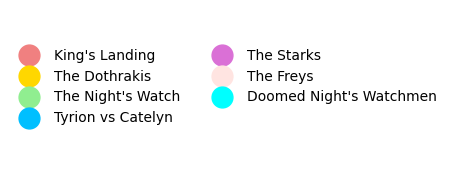

In [54]:
fig_legend, ax_legend = plt.subplots(figsize=(2,2))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Dothrakis")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Night's Watch")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Tyrion vs Catelyn")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The Starks")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="The Freys")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Doomed Night's Watchmen")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [55]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

The Modularity for the Infomap Method is 0.448


### Girvan-Newman

In [102]:
#compute girvan newman communities
from networkx.algorithms import community
com_gn = community.girvan_newman(G)

# To get the communities at different levels
levels = []
desired_number_of_communities = 6
for communities in com_gn:
    levels.append(communities)
    if len(communities) >= desired_number_of_communities:
        break

# The last entry in levels contains the desired number of communities
g_n_comm = [sorted(list(c)) for c in levels[-1]]
n_comm_g_n = len(g_n_comm)
print("Number of communities detected:", n_comm_g_n)
print("Communities:", g_n_comm)




Number of communities detected: 6
Communities: [['ADDAM_MARBRAND', 'AERYS', 'ARYA', 'ASSASSIN', 'BAELOR', 'BALON', 'BARRISTAN', 'BENJEN', 'BERIC', 'BRAN', 'BRANDON_STARK', 'BRONN', 'CATELYN', 'CERSEI', 'GALBART_GLOVER', 'GENDRY', 'GREATJON_UMBER', 'HIGH_SEPTON', 'HODOR', 'HOT_PIE', 'HOUND', 'HUGH_OF_THE_VALE', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JOANNA', 'JOFFREY', 'JON', 'JONOS_BRACKEN', 'JON_ARRYN', 'JORY_CASSEL', 'KEVAN', 'LANCEL', 'LEO_LEFFORD', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LYANNA', 'LYSA', 'MACE', 'MAESTER_LUWIN', 'MARILLION', 'MASHA_HEDDLE', 'MERYN_TRANT', 'MHAEGEN', 'MORD', 'MOUNTAIN', 'MYCAH', 'MYRCELLA', 'NED', 'OLD_NAN', 'OSHA', 'PYCELLE', 'RENLY', 'RHAEGAR', 'RICKARD_KARSTARK', 'RICKARD_STARK', 'RICKON', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROOSE_BOLTON', 'ROS', 'SANSA', 'SEPTA_MORDANE', 'SHAE', 'SHAGGA', 'STANNIS', 'STEFFON', 'SYRIO_FOREL', 'THEON', 'TOBHO_MOTT', 'TOMARD', 'TOMMEN', 'TYRION', 'TYSHA', 'TYWIN', 'VARDIS_EGEN', 'VARLY', 'VARYS', 'YOREN'], ['COHO

In [103]:
# Print each community list
print("List of the characters, divided per communities:")
for idx, community in enumerate(g_n_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: ['ADDAM_MARBRAND', 'AERYS', 'ARYA', 'ASSASSIN', 'BAELOR', 'BALON', 'BARRISTAN', 'BENJEN', 'BERIC', 'BRAN', 'BRANDON_STARK', 'BRONN', 'CATELYN', 'CERSEI', 'GALBART_GLOVER', 'GENDRY', 'GREATJON_UMBER', 'HIGH_SEPTON', 'HODOR', 'HOT_PIE', 'HOUND', 'HUGH_OF_THE_VALE', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JOANNA', 'JOFFREY', 'JON', 'JONOS_BRACKEN', 'JON_ARRYN', 'JORY_CASSEL', 'KEVAN', 'LANCEL', 'LEO_LEFFORD', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LYANNA', 'LYSA', 'MACE', 'MAESTER_LUWIN', 'MARILLION', 'MASHA_HEDDLE', 'MERYN_TRANT', 'MHAEGEN', 'MORD', 'MOUNTAIN', 'MYCAH', 'MYRCELLA', 'NED', 'OLD_NAN', 'OSHA', 'PYCELLE', 'RENLY', 'RHAEGAR', 'RICKARD_KARSTARK', 'RICKARD_STARK', 'RICKON', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROOSE_BOLTON', 'ROS', 'SANSA', 'SEPTA_MORDANE', 'SHAE', 'SHAGGA', 'STANNIS', 'STEFFON', 'SYRIO_FOREL', 'THEON', 'TOBHO_MOTT', 'TOMARD', 'TOMMEN', 'TYRION', 'TYSHA', 'TYWIN', 'VARDIS_EGEN', 'VARLY', 'VARYS', 'YOR

In [106]:
community_graph_layout_gn = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 20,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

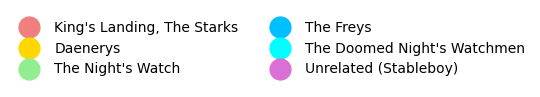

In [109]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing, The Starks")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Night's Watch")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The Freys")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="The Doomed Night's Watchmen")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Unrelated (Stableboy)")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [60]:
def convertInLabelArray_communities(G, list_of_communities):
    # Initialize the label array with a default value that indicates no community found
    d = []
    num_communities = len(list_of_communities)

    # Create a dictionary to map each node to its community label
    node_to_community = {}
    for community_label, community in enumerate(list_of_communities):
        for node in community:
            node_to_community[node] = community_label

    # Populate the label array based on the node's community
    for node in G.nodes():
        if node in node_to_community:
            d.append(node_to_community[node])
        else:
            d.append(num_communities)  # Assign a label for nodes not in any community

    d = np.array(d)
    return d

In [61]:
#modularity
#modularity = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G, next(com))), 3)

modularity_g_n = round(nx.community.modularity(G, next(com_gn)),3)

print("The Modularity for the Girvan-Newman Nethod is", modularity_g_n)

The Modularity for the Girvan-Newman Nethod is 0.293


### Louvain

In [62]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

Number of communities detected: 6


In [63]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

List of the characters, divided per communities:
Community 1: {'OTHOR', 'JAREMY_RYKKER', 'ALLISER_THORNE', 'DAREON', 'RANDYLL', 'OTHELL_YARWYCK', 'PYP', 'LUKE', 'JON', 'RAST', 'MAESTER_AEMON', 'JEOR', 'SAM', 'BOWEN_MARSH', 'BORCAS', 'GRENN', 'MELESSA'}
Community 2: {'MARILLION', 'BENJEN', 'LYSA', 'ROBIN', 'LEO_LEFFORD', 'ADDAM_MARBRAND', 'VARDIS_EGEN', 'SHAGGA', 'JAIME', 'MYRCELLA', 'JOANNA', 'TYWIN', 'KEVAN', 'CATELYN', 'MORD', 'MASHA_HEDDLE', 'BRONN', 'TYRION', 'TYSHA', 'SHAE'}
Community 3: {'DROGO', 'JHIQUI', 'ILLYRIO', 'MIRRI_MAZ_DUUR', 'DOREAH', 'RHAEGO', 'COHOLLO', 'IROGENIA', 'IRRI', 'QOTHO', 'DAENERYS', 'LITTLE_BIRD', 'MAGO', 'WINE_MERCHANT', 'JORAH', 'VISERYS', 'RAKHARO'}
Community 4: {'SYRIO_FOREL', 'MHAEGEN', 'MERYN_TRANT', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'TOMMEN', 'ROOSE_BOLTON', 'STABLE_BOY', 'LANCEL', 'CERSEI', 'MOUNTAIN', 'VARYS', 'TOMARD', 'STANNIS', 'VARLY', 'HIGH_SEPTON', 'LORAS', 'ROS', 'SEPTA_MORDANE', 'JON_ARRYN', 'BERIC', 'JOFFREY', 'NED', 'ILYN_PAYNE', 'TOBHO

In [64]:
community_graph_layout_louvain = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(louvain_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_louvain
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 20,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

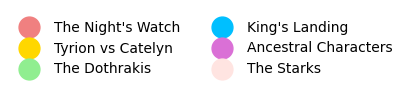

In [65]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Night's Watch")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Tyrion vs Catelyn")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Dothrakis")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Ancestral Characters")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="The Starks")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [66]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

The Modularity for the Louvain Method is 0.45


### Greedy Modularity Maximization

In [67]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

The number of communities detected are: 5


In [68]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: frozenset({'HOSTER', 'RICKARD_KARSTARK', 'BENJEN', 'RYGER_RIVERS', 'BRAN', 'ROBIN', 'HODOR', 'ADDAM_MARBRAND', 'BALON', 'VARDIS_EGEN', 'MYRCELLA', 'JOYEUSE', 'MORD', 'CATELYN', 'OLD_NAN', 'TYSHA', 'BRONN', 'RICKON', 'SHAE', 'JONOS_BRACKEN', 'GALBART_GLOVER', 'GREATJON_UMBER', 'MARILLION', 'STEVRON_FREY', 'LYSA', 'OSHA', 'LEO_LEFFORD', 'RICKARD_STARK', 'MAESTER_LUWIN', 'SHAGGA', 'JON', 'JAIME', 'ASSASSIN', 'ROBB', 'JOANNA', 'TYWIN', 'KEVAN', 'RODRIK', 'MASHA_HEDDLE', 'THEON', 'TYRION', 'BRANDON_STARK', 'WALDER'})
Cluster 2: frozenset({'SYRIO_FOREL', 'MHAEGEN', 'MERYN_TRANT', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'TOMMEN', 'ROOSE_BOLTON', 'STABLE_BOY', 'LANCEL', 'CERSEI', 'MOUNTAIN', 'VARYS', 'TOMARD', 'STANNIS', 'VARLY', 'HIGH_SEPTON', 'LORAS', 'ROS', 'JON_ARRYN', 'SEPTA_MORDANE', 'BERIC', 'NED', 'JOFFREY', 'ILYN_PAYNE', 'TOBHO_MOTT', 'MACE', 'HOUND', 'RENLY', 'PYCELLE', 'YOREN', 'SANSA', 'MYCAH', 'JANOS', 'BARRISTAN', 'JORY_CASS

In [69]:
community_graph_layout_gmm = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 20,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

In [70]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

The modularity for Greedy Modularity Maximization is 0.439


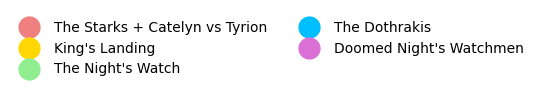

In [71]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Starks + Catelyn vs Tyrion")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Night's Watch")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The Dothrakis")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Doomed Night's Watchmen")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [72]:
#clique percolation (overlap)- change of minimm chars
communities_clique = list(nx.community.k_clique_communities(G, 6))
n_comm_clique = len(communities_clique)
print("Number of communities detected:", n_comm_clique)

Number of communities detected: 5


In [73]:
#list of characters per communities
print("List of the characters divided per communities")
communities_clique

List of the characters divided per communities


[frozenset({'ALLISER_THORNE',
            'DAREON',
            'GRENN',
            'JEOR',
            'JON',
            'MAESTER_AEMON',
            'OTHELL_YARWYCK',
            'PYP',
            'RAST',
            'SAM'}),
 frozenset({'BRONN',
            'CATELYN',
            'LYSA',
            'MORD',
            'ROBIN',
            'TYRION',
            'VARDIS_EGEN'}),
 frozenset({'DAENERYS',
            'DOREAH',
            'DROGO',
            'IRRI',
            'JORAH',
            'RAKHARO',
            'VISERYS'}),
 frozenset({'DAENERYS',
            'DROGO',
            'JORAH',
            'MIRRI_MAZ_DUUR',
            'QOTHO',
            'RAKHARO'}),
 frozenset({'AERYS',
            'ARYA',
            'BAELOR',
            'BARRISTAN',
            'BENJEN',
            'BRAN',
            'CATELYN',
            'CERSEI',
            'DAENERYS',
            'GREATJON_UMBER',
            'HOUND',
            'ILYN_PAYNE',
            'JAIME',
            'JANOS

In [74]:
community_graph_layout_gmm = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(communities_clique):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 20,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

In [75]:
#modularity
modularity_clique = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G,communities_clique)), 3)
print("The modularity for the clique percolation method is", modularity_clique)

The modularity for the clique percolation method is 0.152


In [76]:
!pip install hdbscan
import hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


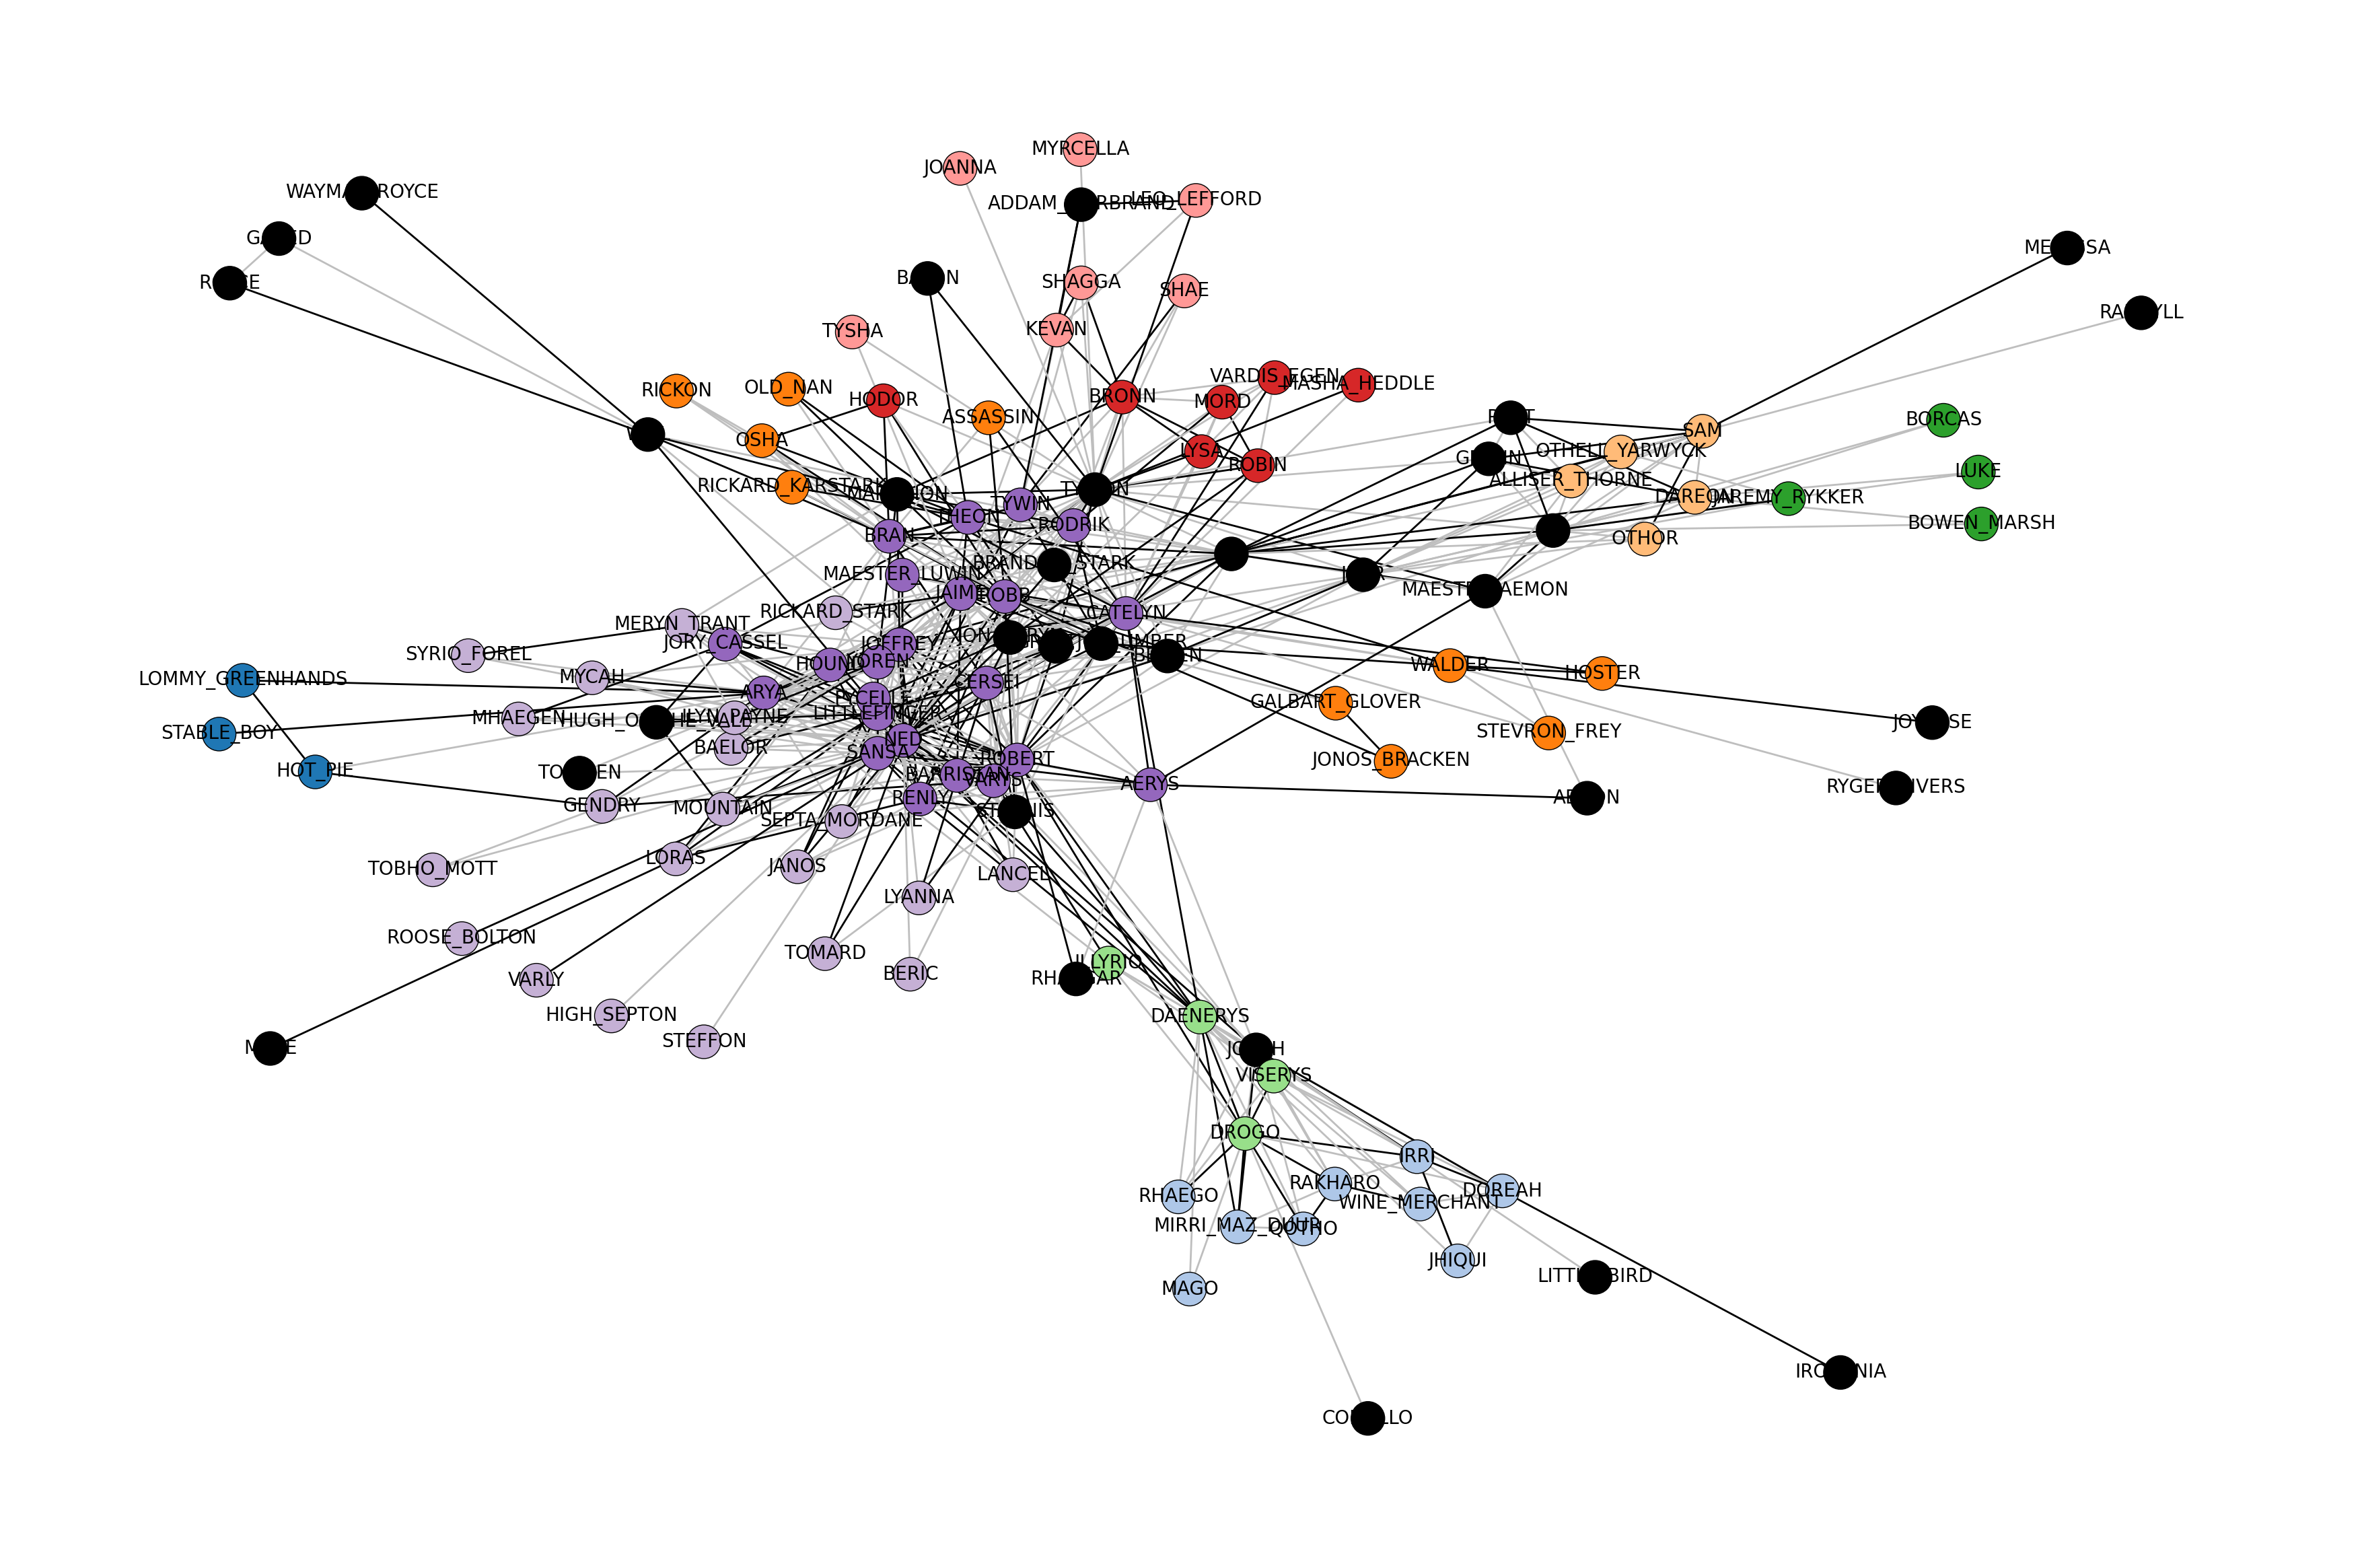

In [77]:
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import hdbscan
import numpy as np

# Use MDS to create a 2D embedding of the graph
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
distances = nx.floyd_warshall_numpy(G)
embeddings = mds.fit_transform(distances)

# Standardize the embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embeddings_scaled)

# Prepare colors for the communities
unique_labels = set(cluster_labels)
cmap = plt.colormaps["tab20"]
colors = [cmap(i) for i in range(len(unique_labels))]
node_colors = [colors[label] if label != -1 else (0, 0, 0, 1) for label in cluster_labels]  # Black for noise points
node_sizes = [50] * len(G.nodes())

# Get the spring layout from networkx
community_graph_layout_hdbscan = nx.spring_layout(G)

# Convert networkx graph to igraph
G_ig = ig.Graph.Adjacency((nx.to_numpy_array(G) > 0).tolist())
G_ig.vs["label"] = list(G.nodes())

# Ensure the graph is undirected
G_ig = G_ig.as_undirected()

# Add positions to igraph nodes
positions = community_graph_layout_hdbscan
G_ig.vs["x"] = [positions[node][0] for node in G.nodes()]
G_ig.vs["y"] = [positions[node][1] for node in G.nodes()]

# Map node indices from NetworkX to igraph
node_index_map = {node: i for i, node in enumerate(G.nodes())}

# Assign edge colors based on node community
edge_colors = []
for edge in G.edges():
    node1, node2 = edge
    index1 = node_index_map[node1]
    index2 = node_index_map[node2]
    if cluster_labels[index1] == cluster_labels[index2]:
        edge_colors.append("black")
    else:
        edge_colors.append("grey")

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 30))
ig.plot(
    G_ig,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=G_ig.vs["label"],
    vertex_label_size=20,
    edge_color=edge_colors
)
plt.show()


In [78]:
clusters = {}
for node, label in zip(G.nodes(), cluster_labels):
    if label not in clusters:
        clusters[label] = set()
    clusters[label].add(node)
print("Clusters:")
for label, nodes in clusters.items():
    print(f"Cluster {label}: {nodes}")

Clusters:
Cluster 8: {'BRAN', 'LITTLEFINGER', 'CATELYN', 'CERSEI', 'VARYS', 'NED', 'JOFFREY', 'MAESTER_LUWIN', 'HOUND', 'JAIME', 'RENLY', 'ROBB', 'PYCELLE', 'TYWIN', 'YOREN', 'RODRIK', 'SANSA', 'BARRISTAN', 'THEON', 'JORY_CASSEL', 'ROBERT', 'AERYS', 'ARYA'}
Cluster 5: {'DROGO', 'ILLYRIO', 'VISERYS', 'DAENERYS'}
Cluster -1: {'BENJEN', 'RYGER_RIVERS', 'RANDYLL', 'ADDAM_MARBRAND', 'BALON', 'TOMMEN', 'COHOLLO', 'WILL', 'MAESTER_AEMON', 'JOYEUSE', 'JORAH', 'LITTLE_BIRD', 'WAYMAR_ROYCE', 'STANNIS', 'GREATJON_UMBER', 'MARILLION', 'ROS', 'JON_ARRYN', 'GARED', 'RHAEGAR', 'IROGENIA', 'PYP', 'MACE', 'JON', 'RAST', 'ROYCE', 'JEOR', 'TYRION', 'BRANDON_STARK', 'GRENN', 'AEGON', 'HUGH_OF_THE_VALE', 'MELESSA'}
Cluster 3: {'OTHOR', 'ALLISER_THORNE', 'DAREON', 'SAM', 'OTHELL_YARWYCK'}
Cluster 6: {'LYSA', 'ROBIN', 'MORD', 'MASHA_HEDDLE', 'BRONN', 'HODOR', 'VARDIS_EGEN'}
Cluster 7: {'JOANNA', 'KEVAN', 'LEO_LEFFORD', 'TYSHA', 'SHAGGA', 'MYRCELLA', 'SHAE'}
Cluster 9: {'SYRIO_FOREL', 'MHAEGEN', 'MERYN_TRANT'

In [79]:
partition_hdbscan = {node: label for label, nodes in clusters.items() for node in nodes}
communities_hdbscan = [set(nodes) for label, nodes in clusters.items()]

modularity_hdbscan = nx.community.modularity(G, communities_hdbscan)
print(f"Modularity for HDBSCAN: {modularity_hdbscan}")

Modularity for HDBSCAN: 0.125042717177448


### Comparison

In [80]:
community_methods =[]
community_methods.append("Infomap")
community_methods.append("Louvain")
community_methods.append("Girvan-Newmann")
community_methods.append("Greedy M.M.")
community_methods.append("Clique Percolation")

methods_modularity = []
methods_modularity.append(modularity_infomap)
methods_modularity.append(modularity_louvain)
methods_modularity.append(modularity_g_n)
methods_modularity.append(modularity_gmm)
methods_modularity.append(modularity_clique)

n_communities = []
n_communities.append(n_comm_infomap)
n_communities.append(n_comm_louvain)
n_communities.append(n_comm_g_n)
n_communities.append(n_comm_gmm)
n_communities.append(n_comm_clique)

print("Comparison between Methods: Number of Communities and Modularity")
print(f"Infomap: {n_communities[0]}  -  {methods_modularity[0]}")
print(f"Louvain: {n_communities[1]}  -  {methods_modularity[1]}")
print(f"Girvan-Newman: {n_communities[2]}  -  {methods_modularity[2]}")
print(f"Greedy Modularity Maximization: {n_communities[3]}  -  {methods_modularity[3]}")
print(f"Clique Percolation: {n_communities[4]}  -  {methods_modularity[4]}")

Comparison between Methods: Number of Communities and Modularity
Infomap: 7  -  0.448
Louvain: 6  -  0.45
Girvan-Newman: 7  -  0.293
Greedy Modularity Maximization: 5  -  0.439
Clique Percolation: 5  -  0.152


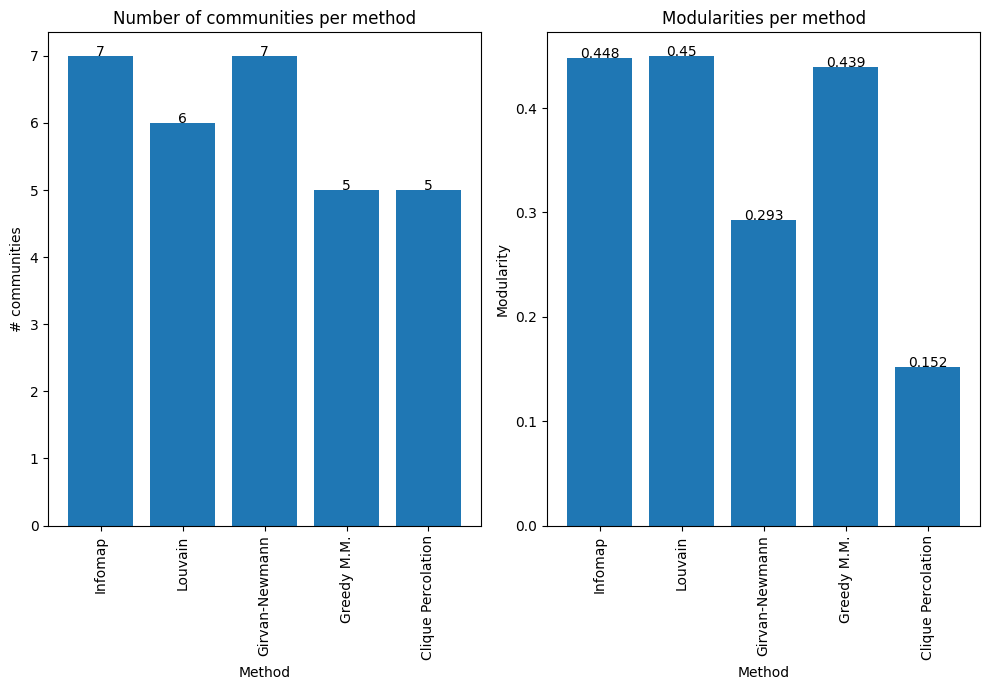

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Number of communities per method
axs[0].bar(community_methods, n_communities)
for i, v in enumerate(n_communities):
    axs[0].text(i, v, str(v), ha='center', color='black')
axs[0].set_xlabel("Method")
axs[0].set_ylabel("# communities")
axs[0].set_title("Number of communities per method")
axs[0].set_xticks(range(len(community_methods)))
axs[0].set_xticklabels(community_methods, rotation='vertical')

# Modularities per method
axs[1].bar(community_methods, methods_modularity)
for i, v in enumerate(methods_modularity):
    axs[1].text(i, v, str(v), ha='center', color='black')
axs[1].set_xlabel("Method")
axs[1].set_ylabel("Modularity")
axs[1].set_title("Modularities per method")
axs[1].set_xticks(range(len(community_methods)))
axs[1].set_xticklabels(community_methods, rotation='vertical')

plt.tight_layout()
plt.show()

## Robustness

### Random Nodes Removal

In [82]:
random_seed = 30
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(graph_copy.nodes(), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    random_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

df = pd.DataFrame(random_res).T  # Transpose to have the samples as rows
df


<ipython-input-82-968b313867c5>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(graph_copy.nodes(), nodes)


average shortest path  diameter  Mean betwennes centrality  \
5                2.620028       6.0                   0.013389   
10               2.688756       6.0                   0.014814   
15               2.950183       7.0                   0.016001   
20               2.595089       6.0                   0.014478   
25               2.731515       6.0                   0.017144   
30               2.765568       6.0                   0.016867   
35               2.518851       5.0                   0.016691   

    Mean closeness centrality  Mean eigenvector centrality  \
5                    0.386510                     0.060400   
10                   0.383385                     0.061822   
15                   0.314115                     0.061713   
20                   0.375246                     0.064789   
25                   0.371092                     0.067791   
30                   0.337591                     0.063647   
35                   0.399948                     0.071421   

    Mean harmonic centrality  Mean degree centrality  number of components  
5                   0.386510                0.060400                   2.0  
10                  0.383385                0.061822                   1.0  
15                  0.314115                0.061713                   7.0  
20                  0.375246                0.064789                   4.0  
25                  0.371092                0.067791                   2.0  
30                  0.337591                0.063647                   6.0  
35                  0.399948                0.071421                   2.0

In [83]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

Isolated nodes in the network:  0 is [{'LITTLE_BIRD'}]
Isolated nodes in the network:  2 is [{'STABLE_BOY'}, {'HIGH_SEPTON'}, {'LITTLE_BIRD'}, {'ROOSE_BOLTON'}, {'STEFFON'}, {'VARLY'}]
Isolated nodes in the network:  3 is [{'RYGER_RIVERS'}, {'LITTLE_BIRD'}, {'JOYEUSE'}]
Isolated nodes in the network:  4 is [{'LITTLE_BIRD'}]
Isolated nodes in the network:  5 is [{'MAGO'}, {'BALON'}, {'COHOLLO'}, {'MYRCELLA'}, {'JOANNA'}]
Isolated nodes in the network:  6 is [{'MACE'}]


In [84]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness "][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)
    """
    if len(components) ==1:   #if the grapgh is connected (never in this graph)
      #compute all the new metrics
      d =  nx.diameter(new_graph)
      s = nx.shortest_path(new_graph)
      a_s = nx.average_shortest_path_length(new_graph)
      bcen = nx.betweenness_centrality(new_graph)
      ccen = nx.closeness_centrality(new_graph)
      ecen = nx.eigenvector_centrality(new_graph)
      centrality_res[i] = {'diameter' : d, 'shortest path': s, 'average shortest path': a_s, 'betwennes centrality': bcen, 'closeness centrality': ccen,'eigenvector centrality': ecen}
    else:   #if the grapgh isn't connected
    """
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)


df = pd.DataFrame(centrality_res).T  # Transpose to have the samples as rows
df

average shortest path  diameter  Mean betwennes centrality  \
1               2.772865       6.0                   0.013502   
3               2.982759       6.0                   0.014567   
5               3.156764       6.0                   0.015797   

   Mean closeness centrality  Mean eigenvector centrality  \
1                   0.348188                     0.058298   
3                   0.307603                     0.055806   
5                   0.285406                     0.054920   

   Mean harmonic centrality  Mean degree centrality  number of components  
1                  0.348188                0.058298                   5.0  
3                  0.307603                0.055806                   8.0  
5                  0.285406                0.054920                   9.0

In [85]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)


Isolated nodes in the first network:  [{'HIGH_SEPTON'}, {'ROOSE_BOLTON'}, {'STEFFON'}, {'VARLY'}]
Isolated nodes in the second network:  [{'MASHA_HEDDLE'}, {'MYRCELLA'}, {'HIGH_SEPTON'}, {'JOANNA'}, {'ROOSE_BOLTON'}, {'STEFFON'}, {'VARLY'}]
Isolated nodes in the third network:  [{'MASHA_HEDDLE'}, {'BERIC'}, {'MYRCELLA'}, {'HIGH_SEPTON'}, {'JOANNA'}, {'ROOSE_BOLTON'}, {'STEFFON'}, {'VARLY'}]


### Preferential Attachment - Link Prediction

In [86]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

First node   Second node  Score
7298         SANSA        TYRION   1066
520   LITTLEFINGER          ROBB    780
1505         DROGO           NED    741
6304      DAENERYS        TYRION    738
6347         RENLY        TYRION    697
...            ...           ...    ...
5432   LITTLE_BIRD  RYGER_RIVERS      1
4628         VARLY      MYRCELLA      1
5440   LITTLE_BIRD    STABLE_BOY      1
5441   LITTLE_BIRD       JOYEUSE      1
959        COHOLLO          MACE      1

[7326 rows x 3 columns]

In [87]:
#adamic_adar_index
preds = nx.adamic_adar_index(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

adamic_adar_index = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

adamic_adar_index = adamic_adar_index.sort_values("Score", ascending=False)
adamic_adar_index.head(5)

First node Second node     Score
520   LITTLEFINGER        ROBB  4.432273
7298         SANSA      TYRION  4.090940
3505        ROBERT       YOREN  3.800248
5667         VARYS       JAIME  3.717154
4942       PYCELLE       JAIME  3.682878

In [88]:
#jaccard similarity
preds = nx.jaccard_coefficient(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node   Second node  Score
1230    BOWEN_MARSH          LUKE    1.0
4956         JOANNA      MYRCELLA    1.0
1242    BOWEN_MARSH        BORCAS    1.0
6882   RYGER_RIVERS       JOYEUSE    1.0
4638          VARLY   HIGH_SEPTON    1.0
...             ...           ...    ...
1534          DROGO         GRENN    0.0
1533          DROGO       HOT_PIE    0.0
1532          DROGO  MASHA_HEDDLE    0.0
4323  MAESTER_AEMON        RICKON    0.0
0            HOSTER   SYRIO_FOREL    0.0

[7326 rows x 3 columns]

### Link Prediction Between Graph and New Nodes

In [89]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=30, initial_graph=G)

In [90]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
445      JAIME         126     25

In [91]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=30, initial_graph=G)

In [92]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
92           ROBERT         126    370
261         CATELYN         126    370
383           SANSA         126    270
182    LITTLEFINGER         126    270
451           JAIME         126    250
427           THEON         126    200
109        DAENERYS         126    190
545           AERYS         126    140
516   MAESTER_AEMON         126    100
527  ALLISER_THORNE         126     90

In [93]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=30, initial_graph=G)

In [94]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

First node Second node  Score
59            NED         132    480
58            NED         128    480
57            NED         127    480
345        TYRION         131    387
346        TYRION         133    344
..            ...         ...    ...
619       RHAEGAR         135     24
616  RYGER_RIVERS         131     18
626        JOANNA         127     16
617  WAYMAR_ROYCE         130     16
627         VARLY         128     16

[80 rows x 3 columns]

In [95]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

First node
CATELYN             4
JAIME               4
NED                 3
JON                 3
DAREON              3
JEOR                3
RENLY               3
PYP                 3
HOUND               2
HUGH_OF_THE_VALE    2
MAESTER_AEMON       2
TYRION              2
TYWIN               2
DOREAH              2
THEON               2
SANSA               2
CERSEI              2
ARYA                2
ROBERT              2
LITTLEFINGER        2
VARYS               2
PYCELLE             1
RICKARD_STARK       1
WAYMAR_ROYCE        1
JOANNA              1
RYGER_RIVERS        1
RHAEGAR             1
HOSTER              1
BORCAS              1
LUKE                1
BALON               1
JHIQUI              1
ASSASSIN            1
HOT_PIE             1
MYCAH               1
GENDRY              1
AERYS               1
MORD                1
KEVAN               1
DAENERYS            1
MOUNTAIN            1
JORY_CASSEL         1
131                 1
ALLISER_THORNE      1
BENJEN              1
BARRISTAN           1
BRONN               1
RODRIK              1
VARLY               1
Name: count, dtype: int64

In [96]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

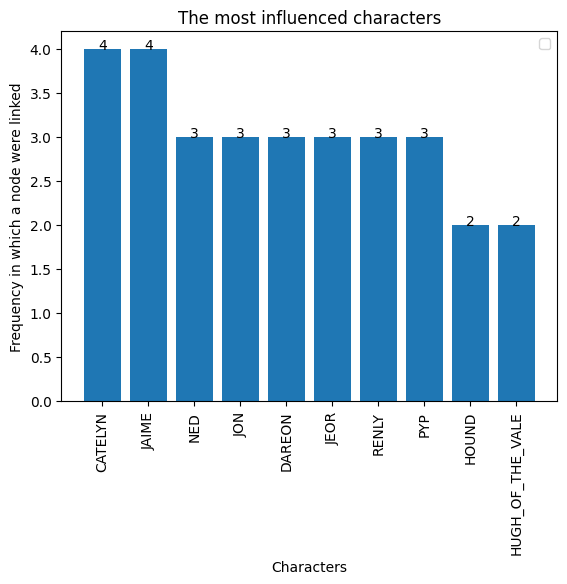

In [97]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()